# Step 1: Data Loading and Initial Inspection

In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


file_path = 'default of credit card clients.xls'
default_data = pd.read_excel(file_path, header=1)

### Display the first few rows of the dataset

In [2]:
default_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   1           29999 non-null  int64 
 1   20000       29999 non-null  int64 
 2   female      29999 non-null  object
 3   university  29999 non-null  object
 4   married     29999 non-null  object
 5   24          29999 non-null  int64 
 6   2           29999 non-null  int64 
 7   2.1         29999 non-null  int64 
 8   -1          29999 non-null  int64 
 9   -1.1        29999 non-null  int64 
 10  -2          29999 non-null  int64 
 11  -2.1        29999 non-null  int64 
 12  3913        29999 non-null  int64 
 13  3102        29999 non-null  int64 
 14  689         29999 non-null  int64 
 15  0           29999 non-null  int64 
 16  0.1         29999 non-null  int64 
 17  0.2         29999 non-null  int64 
 18  0.3         29999 non-null  int64 
 19  689.1       29999 non-null  int64 
 20  0.4   

In [3]:
default_data.head()

,1,20000,female,university,married,24,2,2.1,-1,-1.1,...,0,0.1,0.2,0.3,689.1,0.4,0.5,0.6,0.7,1.1
0,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
1,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
2,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
3,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
4,6,50000,male,graduate school,single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [4]:
default_data.tail()

,1,20000,female,university,married,24,2,2.1,-1,-1.1,...,0,0.1,0.2,0.3,689.1,0.4,0.5,0.6,0.7,1.1
29994,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29995,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29996,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29997,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29998,30000,50000,male,university,married,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
default_data.isna().sum()

1             0
20000         0
female        0
university    0
married       0
24            0
2             0
2.1           0
-1            0
-1.1          0
-2            0
-2.1          0
3913          0
3102          0
689           0
0             0
0.1           0
0.2           0
0.3           0
689.1         0
0.4           0
0.5           0
0.6           0
0.7           0
1.1           0
dtype: int64

In [6]:
default_data.duplicated().sum()

0

# Step 2: Pre-processing for Classification

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'default of credit card clients.xls'
default_data = pd.read_excel(file_path, header=1)

# Inspect the first few rows of the dataset to identify the correct column names
print(default_data.head())

# Rename columns based on inspection
default_data.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                        'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                        'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                        'default_payment_next_month']

# Rename the target column for clarity
default_data.rename(columns={'default_payment_next_month': 'default'}, inplace=True)

# Convert categorical columns to numeric using one-hot encoding
default_data = pd.get_dummies(default_data, columns=['SEX', 'EDUCATION', 'MARRIAGE'])

# Separate features and target
X = default_data.drop(columns=['ID', 'default'])
y = default_data['default']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

   1   20000  female       university  married  24  2  2.1  -1  -1.1  ...  \
0  2  120000  female       university   single  26 -1    2   0     0  ...   
1  3   90000  female       university   single  34  0    0   0     0  ...   
2  4   50000  female       university  married  37  0    0   0     0  ...   
3  5   50000    male       university  married  57 -1    0  -1     0  ...   
4  6   50000    male  graduate school   single  37  0    0   0     0  ...   

       0    0.1    0.2   0.3  689.1    0.4   0.5   0.6   0.7  1.1  
0   3272   3455   3261     0   1000   1000  1000     0  2000    1  
1  14331  14948  15549  1518   1500   1000  1000  1000  5000    0  
2  28314  28959  29547  2000   2019   1200  1100  1069  1000    0  
3  20940  19146  19131  2000  36681  10000  9000   689   679    0  
4  19394  19619  20024  2500   1815    657  1000  1000   800    0  

[5 rows x 25 columns]
X_train shape: (23999, 30), y_train shape: (23999,)
X_test shape: (6000, 30), y_test shape: (6000,)


# Step 3: Model Implementation

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import accuracy_score, f1_score

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Support Vector Classifier
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

# CatBoost
cb_model = cb.CatBoostClassifier(verbose=0, random_state=42)
cb_model.fit(X_train, y_train)
cb_pred = cb_model.predict(X_test)

# Stacking Classifier
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42, probability=True)),
    ('xgb', xgb.XGBClassifier(random_state=42)),
    ('lgb', lgb.LGBMClassifier(random_state=42)),
    ('cb', cb.CatBoostClassifier(verbose=0, random_state=42))
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict(X_test)


[LightGBM] [Info] Number of positive: 5308, number of negative: 18691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3284
[LightGBM] [Info] Number of data points in the train set: 23999, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221176 -> initscore=-1.258827
[LightGBM] [Info] Start training from score -1.258827
[LightGBM] [Info] Number of positive: 5308, number of negative: 18691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3284
[LightGBM] [Info] Number of data points in the train set: 23999, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221176 -> initscore=-1.258827
[LightGBM] [Info] Start training from score -1.258827
[LightGBM] [In

# Step 4: Optimization with Optuna

In [9]:
import optuna
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score
from optuna.integration import LightGBMPruningCallback

# Define the objective function for optimization
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'binary_error',  # Ensure consistency with the maximize direction
        'verbosity': -1,  # Suppress LightGBM's output
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)
    }

    # LightGBM expects a validation dataset to perform early stopping
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_test, label=y_test)

    pruning_callback = LightGBMPruningCallback(trial, 'binary_error', valid_name='valid_0')

    # Train the model
    gbm = lgb.train(param, dtrain, valid_sets=[dvalid], valid_names=['valid_0'], callbacks=[pruning_callback])

    preds = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    pred_labels = (preds >= 0.5).astype(int)

    # Calculate the binary error
    error = 1 - accuracy_score(y_test, pred_labels)
    return error

# Run the optimization
optuna.logging.set_verbosity(optuna.logging.WARNING)  # Suppress Optuna logs

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_score = study.best_value
print(f"Best parameters for LightGBM: {best_params}")
print(f"Best binary error: {best_score}")

# Train the final model with the best parameters
final_gbm = lgb.train(best_params, lgb.Dataset(X_train, label=y_train), valid_sets=[lgb.Dataset(X_test, label=y_test)])
final_preds = final_gbm.predict(X_test)
final_pred_labels = (final_preds >= 0.5).astype(int)

final_accuracy = accuracy_score(y_test, final_pred_labels)
final_f1 = f1_score(y_test, final_pred_labels)

print(f"Optimized LightGBM Accuracy: {final_accuracy}")
print(f"Optimized LightGBM F1 Score: {final_f1}")

Best parameters for LightGBM: {'lambda_l1': 0.050072872496992514, 'lambda_l2': 6.220585839361187e-07, 'num_leaves': 8, 'feature_fraction': 0.5035085584966246, 'bagging_fraction': 0.7077318101331483, 'bagging_freq': 7, 'min_child_samples': 37}
Best binary error: 0.1821666666666667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3284
[LightGBM] [Info] Number of data points in the train set: 23999, number of used features: 29
[LightGBM] [Info] Start training from score 0.221176
Optimized LightGBM Accuracy: 0.8181666666666667
Optimized LightGBM F1 Score: 0.4675451439726696


# Step 5: Evaluation and Results Compilation

In [10]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVC', 'XGBoost', 'LightGBM', 'CatBoost', 'StackingClassifier'],
    'Accuracy': [
        accuracy_score(y_test, log_reg_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, svc_pred),
        accuracy_score(y_test, xgb_pred),
        accuracy_score(y_test, lgb_pred),
        accuracy_score(y_test, cb_pred),
        accuracy_score(y_test, stacking_pred)
    ],
    'F1 Score': [
        f1_score(y_test, log_reg_pred),
        f1_score(y_test, rf_pred),
        f1_score(y_test, svc_pred),
        f1_score(y_test, xgb_pred),
        f1_score(y_test, lgb_pred),
        f1_score(y_test, cb_pred),
        f1_score(y_test, stacking_pred)
    ]
})

results

,Model,Accuracy,F1 Score
0,Logistic Regression,0.810167,0.364042
1,Random Forest,0.815167,0.471653
2,SVC,0.814167,0.431413
3,XGBoost,0.811167,0.459704
4,LightGBM,0.819167,0.475592
5,CatBoost,0.816833,0.469850
6,StackingClassifier,0.818833,0.474625


# Step 6: Univariate Analysis of Best Model

[LightGBM] [Warning] feature_fraction is set=0.5035085584966246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5035085584966246
[LightGBM] [Warning] lambda_l1 is set=0.050072872496992514, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.050072872496992514
[LightGBM] [Warning] lambda_l2 is set=6.220585839361187e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.220585839361187e-07
[LightGBM] [Warning] bagging_fraction is set=0.7077318101331483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7077318101331483
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5035085584966246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5035085584966246
[LightGBM] [Warning] lambda_l1 is set=0.050072872496992514, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.050072872496992514
[LightGBM] [Warning] la

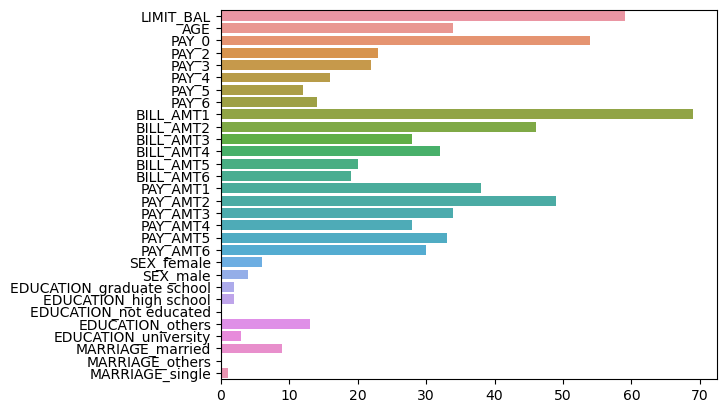

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
best_lgb = lgb.LGBMClassifier(**best_params, random_state=42)
best_lgb.fit(X_train, y_train)
best_lgb_pred = best_lgb.predict(X_test)


feature_importances = pd.Series(best_lgb.feature_importances_, index=X.columns)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.show()

In [1]:
import subprocess
installed_packages = subprocess.check_output(['pip', 'freeze']).decode('utf-8')
with open('requirements.txt', 'w') as f:
    f.write(installed_packages)

print("requirements.txt file created.")

requirements.txt file created.
